In [1]:
import math as m

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import special
from pylab import *
%matplotlib inline

from src import billiardClass as bc
from src import curveClass as cv
from src import plottingFunctions as pf
#from src import verginiSaraceno as vs
#from src import planeWaveDecomposition as pwd

In [2]:
# line
def line_r(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    x = (x1-x0) * t + x0 
    y = (y1-y0) * t + y0
    return x, y

def line_n(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    nx = (y1 - y0)/l
    ny = (x0 - x1)/l
    return nx, ny

def line_arc(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    return t * l

# circle arc
def circle_r(t, R = 1, x0 = 0, y0 = 0, angle = 2*np.pi, shift = 0):
    x = x0 + R * np.cos(t*angle + shift)
    y = y0 + R * np.sin(t*angle + shift)
    return x, y

def circle_n(t, angle = 2*np.pi, shift = 0, **kwargs):
    nx = np.cos(t*angle + shift)
    ny = np.sin(t*angle + shift)
    return nx, ny

def circle_arc(t, R = 1, angle = 2*np.pi, **kwargs):
    return  R * angle *t

In [3]:
params = {}
circle = cv.curve(circle_r, circle_n, circle_arc)

In [4]:
circleBilliard = bc.billiard([circle], np.pi, point_densities=[10])

In [5]:
k0 = 2.4
dk = 0.05
N = 200
circleBilliard.scaling_eigenvalues(N, k0, dk)

array([ 2.40482075])

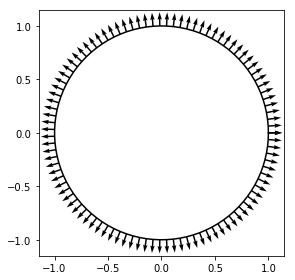

In [6]:
pf.plot_boundary(circleBilliard, M =10)

In [7]:
k0 = 2.4
dk = 0.05
N = 200
circleBilliard.scaling_eigenvalues(N, k0, dk)

array([ 2.40482075])

In [8]:
k0 = 2.4
dk = 0.05
N = 200
circleBilliard.PWD_eigenvalue(N, k0, dk)

     fun: 1.583057938870828e-11
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 2.4048243877930671

In [9]:
special.jn_zeros(0,1)

array([ 2.40482556])

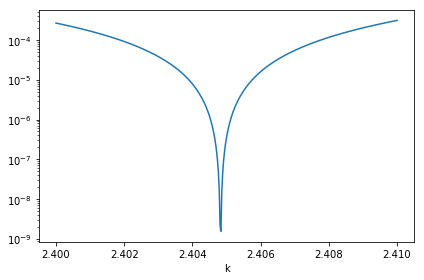

In [10]:
circleBilliard.plot_tension(2.4, 2.41, grid = 400)

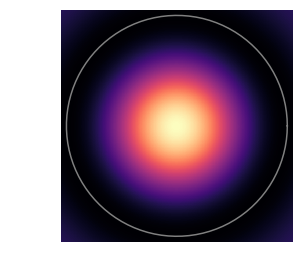

In [11]:
circleBilliard.plot_probability( 2.4048243877930671)

In [15]:
params_1 = {"angle" : np.pi/2}
arc_1 = cv.curve(circle_r, circle_n, circle_arc, **params_1)
params_2 = {"x0": 0, "x1": -1, "y0": 1, "y1": 0}
line_2 = cv.curve(line_r, line_n, line_arc, **params_2)
params_3 = {"x0": -1, "x1": -1, "y0": 0, "y1": -1}
line_3 = cv.curve(line_r, line_n, line_arc, **params_3)
params_4 = {"x0": -1, "x1": 0.5, "y0": -1, "y1": -1}
line_4 = cv.curve(line_r, line_n, line_arc, **params_4)
params_5 = {"R" : 0.5, "x0": 0.5, "y0" : -0.5 , "angle" : np.pi/2, "shift" : 3*np.pi/2}
arc_5 = cv.curve(circle_r, circle_n, circle_arc, **params_5)
params_6 = {"x0": 1, "x1": 1, "y0": -0.5, "y1": 0}
line_6 = cv.curve(line_r, line_n, line_arc, **params_6)

curves = [arc_1, line_2, line_3, line_4, arc_5, line_6]
area = np.pi/4 + 1/2 + 1.5 + np.pi *0.5**2 + 0.5**2
dens = [15 for i in curves]
dens[1] = 20

weirdBilliard = bc.billiard(curves, area, point_densities= dens)


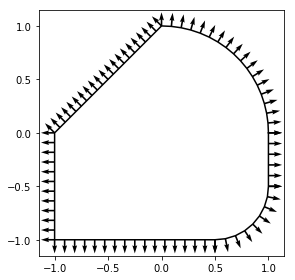

In [16]:
pf.plot_boundary(weirdBilliard , M =5)

In [18]:
k0 = 2.4
dk = 0.05
N = 200
VSresult = weirdBilliard.scaling_eigenvalues(N, k0, dk)
print(VSresult)

[ 2.44843948]


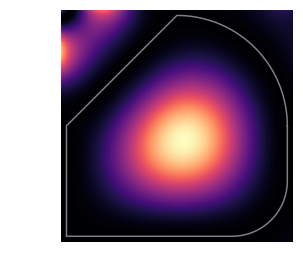

In [21]:
weirdBilliard.plot_probability(VSresult[0])

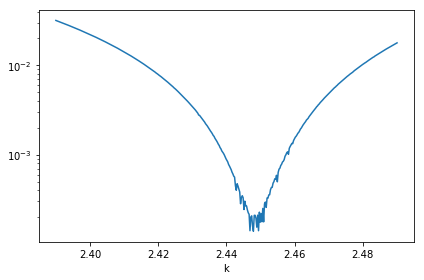

In [22]:
k0 = 2.44
dk = 0.05
weirdBilliard.plot_tension( k0 -dk, k0+dk, N = 200, grid = 400)

In [23]:
k0 = 2.4
dk = 0.05
N = 200
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)

     fun: 0.00011862633978545246
 message: 'Solution found.'
    nfev: 18
  status: 0
 success: True
       x: 2.4485096443520655


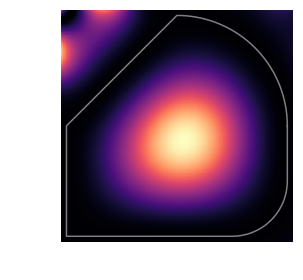

In [24]:
weirdBilliard.plot_probability(PWDresult.x)

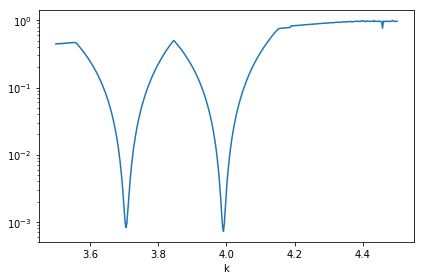

In [25]:
k1 = 3.5
k2 = 4.5
weirdBilliard.plot_tension(k1, k2, N = 200, grid = 400)

     fun: 0.00083560813011563935
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 3.7042101719189509


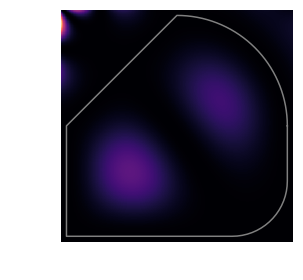

In [26]:
k0 = 3.7
dk = 0.25
N = 500
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)
weirdBilliard.plot_probability(PWDresult.x)

     fun: 0.00067829977476680794
 message: 'Solution found.'
    nfev: 23
  status: 0
 success: True
       x: 3.9920211449299741


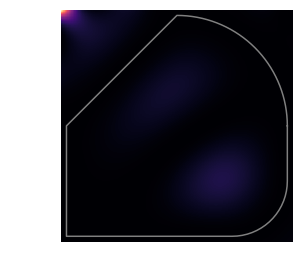

In [27]:
k0 = 4
dk = 0.25
N = 500
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)
weirdBilliard.plot_probability( PWDresult.x)